<h3>Modelo de clasificación de imagenes Pizza vs. Helado</h3>
<p>Aldo Tena García - A01275222</p>

In [2]:
#Importar las librerias necesarias
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, precision_score, ConfusionMatrixDisplay

import os
from PIL import Image
import matplotlib.pyplot as plt
import scipy.ndimage
import numpy as np

In [3]:
#Establecer los directorios de las imágenes
#Directorio base
base_dir = 'D:\DocumentosDD\Profesional\8vo Semestre\Aplicaciones avanzadas\Modulo 2 - IA\ImageClassification'
#Directorios de train y test
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')
#Directorios de train para pizza y helado
train_pizza = os.path.join(train_dir,'pizza')
train_icecream = os.path.join(train_dir, 'icecream')
#Directorios de test para pizza y helado
test_pizza = os.path.join(test_dir,'pizza')
test_icecream = os.path.join(test_dir, 'icecream')

In [4]:
#Tamaño al que quieres redimensionar las imágenes (en píxeles)
size = (224,224) 
#Función para iterar sobre todos los archivos en la carpeta
def resize(folder):
    for file in os.listdir(folder):
        if file.endswith(".jpg"):
            full_path = os.path.join(folder, file)
            image = Image.open(full_path)
            resized_image = image.resize(size, Image.ANTIALIAS)
            resized_image.save(os.path.join(folder,file))
#Redimensionar test-pizza
resize(test_pizza)
#Redimensionar test-icecream
resize(test_icecream)
#Redimensionar train-pizza
resize(train_pizza)
#Redimensionar train-icecream
resize(train_icecream)

C:\Users\atg00\AppData\Local\Temp\ipykernel_17848\2130578046.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(size, Image.ANTIALIAS)


### Data augmentation

In [5]:
#Configurar los parametros necesarios para el data augmentation
train_datagen = ImageDataGenerator(
					rescale = 1./255,
					rotation_range = 30,
					width_shift_range = 0.2,
					height_shift_range = 0.2,
					shear_range = 0.3,
					zoom_range = 0.3,
					horizontal_flip = True
					)

In [6]:
#Configurar el train_datagen 
train_generator = train_datagen.flow_from_directory(
					train_dir,
					target_size = (224,224),
					batch_size = 32,
					class_mode ='binary',
					)

Found 720 images belonging to 2 classes.


### Imprimir imágenes generadas

<Figure size 640x480 with 0 Axes>

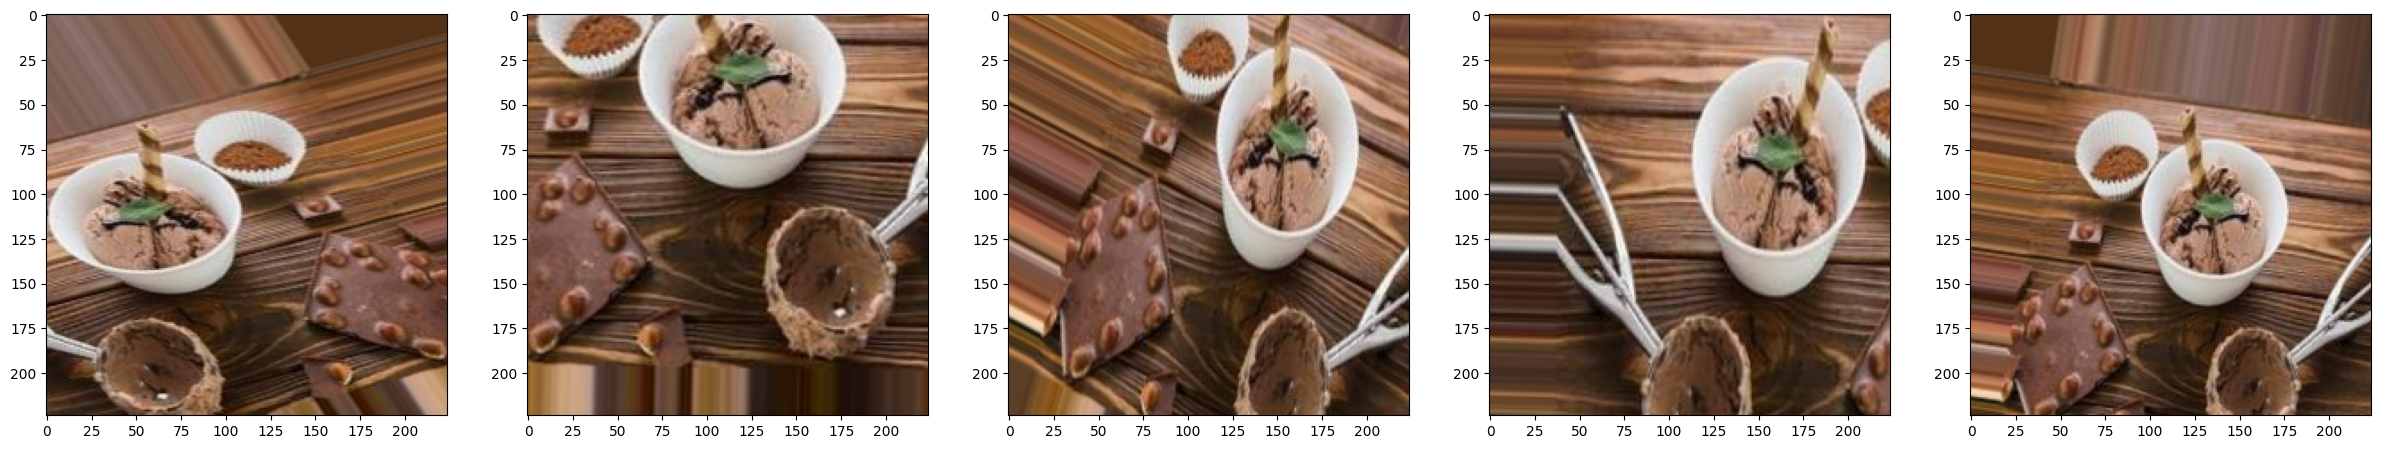

In [7]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30,8)) 
for i in range(5) :
    axarr[i].imshow(train_generator[0][0][0])

(32, 224, 224, 3)
[0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 0.]


<Figure size 640x480 with 0 Axes>

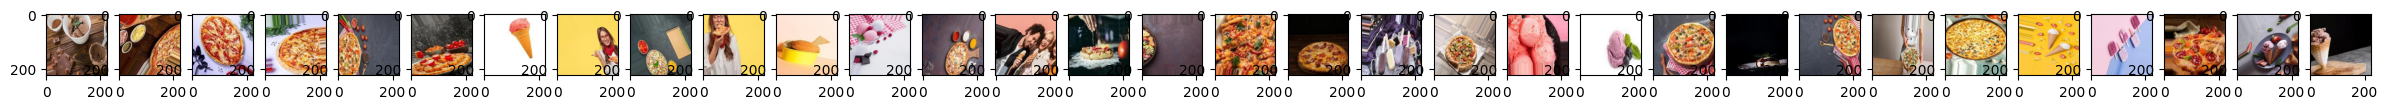

In [8]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
    axarr[i].imshow(images[i])

### MODELO 1 - Red neuronal convolucional

In [11]:
# Definición del modelo
model1 = models.Sequential()

# Primera capa convolucional
model1.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(224, 224, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.MaxPooling2D((3, 3)))
model1.add(layers.BatchNormalization())

# Segunda capa convolucional
model1.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.MaxPooling2D((3, 3)))
model1.add(layers.BatchNormalization())

# Tercera capa convolucional
model1.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.BatchNormalization())

# Cuarta capa convolucional
model1.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.MaxPooling2D((3, 3)))
model1.add(layers.BatchNormalization())

# Quinta capa convolucional
model1.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.BatchNormalization())

# Capas finales
model1.add(layers.Flatten())
model1.add(layers.Dense(1024, activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(1, activation='sigmoid'))  # Cambiar a una única neurona con 'sigmoid'

model1.summary()

# Compilación del modelo
model1.compile(loss='binary_crossentropy',  # Cambiar a 'binary_crossentropy'
                optimizer=optimizers.Adam(learning_rate=0.001),
                metrics=['acc'])

# Entrenamiento del modelo
history = model1.fit(train_generator, epochs=25)

c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 74, 74, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 128)      │       147,58

 Total params: 2,384,385 (9.10 MB)

 Trainable params: 2,380,673 (9.08 MB)

 Non-trainable params: 3,712 (14.50 KB)

Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - acc: 0.7317 - loss: 0.8108
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.8317 - loss: 0.5304
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.8579 - loss: 0.4638
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.8714 - loss: 0.3686
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9084 - loss: 0.3047
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.8684 - loss: 0.3493
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.8785 - loss: 0.2850
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.9199 - loss: 0.2516
Epoch 9/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9199 - loss: 0.2428
Epoch 10/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.8810 - loss: 0.2834
Epoch 11/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9207 - loss: 0.2581
Epoch 12/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9217 - loss: 0.2401
Epoch 13/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/ste

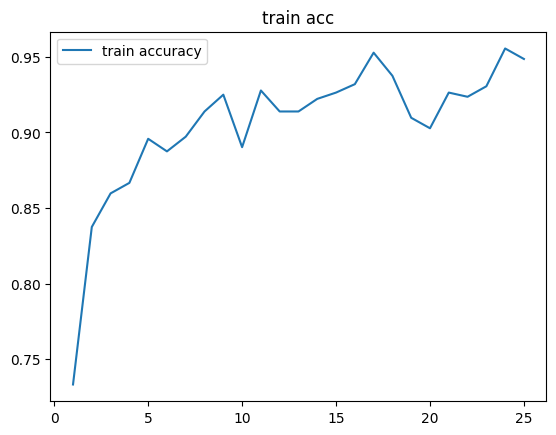

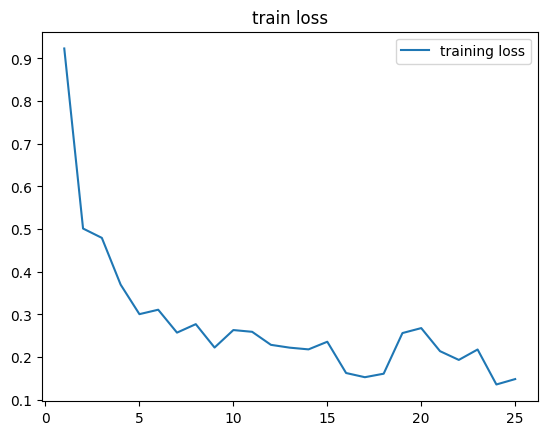

Found 180 images belonging to 2 classes.


c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.6131 - loss: 1.6253 

test acc :
 0.6166666746139526


c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
C:\Users\atg00\AppData\Local\Temp\ipykernel_17848\2023088074.py:30: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  model1_test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step
Precisión:
0.5714285714285714


<Figure size 1000x1000 with 0 Axes>

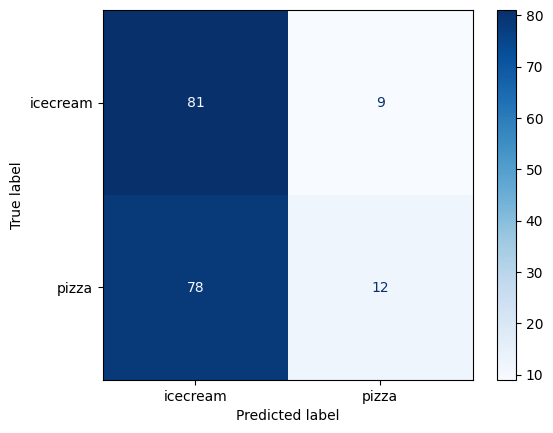


Precision: 0.5714


In [12]:

# Visualización de los resultados de entrenamiento
model1_acc = history.history['acc']
model1_loss = history.history['loss']
model1_epochs = range(1, len(model1_acc) + 1)

plt.plot(model1_epochs, model1_acc, '-', label='train accuracy')
plt.title('train acc')
plt.legend()
plt.figure()

plt.plot(model1_epochs, model1_loss, '-', label='training loss')
plt.title('train loss')
plt.legend()
plt.show()

# Generador de datos de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluación del modelo
model1_test_loss, model1_test_acc = model1.evaluate(test_generator, steps=25)
print('\ntest acc :\n', model1_test_acc)

# Generar predicciones en el conjunto de prueba
model1_test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
model1_predictions = model1.predict(test_generator, steps=model1_test_steps_per_epoch)
model1_predicted_classes = np.where(model1_predictions > 0.5, 1, 0)

# Obtener etiquetas reales
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calcular matriz de confusión
model1_cm = confusion_matrix(true_classes, model1_predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=model1_cm, display_labels=class_labels)

# Calcular el valor de precisión
model1_precision = precision_score(true_classes, model1_predicted_classes)
print('Precisión:')
print(model1_precision)

# Mostrar matriz de confusión
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calcular precisión
precision = precision_score(true_classes, model1_predicted_classes)
print('\nPrecision: {:.4f}'.format(precision))

### MODELO 2 - Red Neuronal Convolucional mejorada

In [13]:
# Definición del modelo
model2 = models.Sequential()

# Capas convolucionales y de pooling con regularización
model2.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(224, 224, 3)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))

model2.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))

model2.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.4))

model2.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.4))

model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))  # Cambiar a una única neurona con 'sigmoid'

model2.summary()

# Compilación del modelo
model2.compile(loss='binary_crossentropy',  # Cambiar a 'binary_crossentropy'
                optimizer=optimizers.Adam(learning_rate=0.0001),  # Tasa de aprendizaje menor
                metrics=['acc'])

# Entrenamiento del modelo
history = model2.fit(train_generator, epochs=50, validation_data=test_generator, validation_steps=25)

c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,090,369 (49.94 MB)

 Trainable params: 13,088,641 (49.93 MB)

 Non-trainable params: 1,728 (6.75 KB)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - acc: 0.6067 - loss: 0.8293 - val_acc: 0.5000 - val_loss: 0.6785
Epoch 2/50


c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - acc: 0.7505 - loss: 0.6693 - val_acc: 0.5000 - val_loss: 1.0982
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - acc: 0.7792 - loss: 0.5445 - val_acc: 0.5000 - val_loss: 1.0358
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - acc: 0.8101 - loss: 0.4937 - val_acc: 0.5000 - val_loss: 1.8034
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - acc: 0.8004 - loss: 0.4810 - val_acc: 0.5000 - val_loss: 2.9827
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - acc: 0.8069 - loss: 0.5294 - val_acc: 0.5000 - val_loss: 2.3106
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - acc: 0.8388 - loss: 0.4138 - val_acc: 0.5000 - val_loss: 2.2072
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - acc: 0.8139 - loss: 0.4305 - val_acc: 0.5000 - val_loss: 2.3248
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - acc: 0.8226 - loss: 0.4024 - val_acc: 0.5000 - val_loss: 2.4262
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - acc: 0.8381 - loss: 0.3952 - v

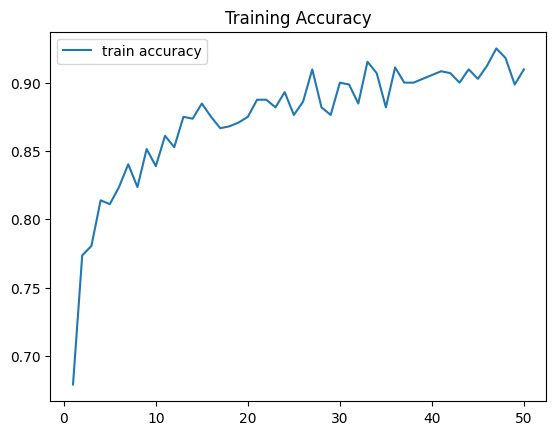

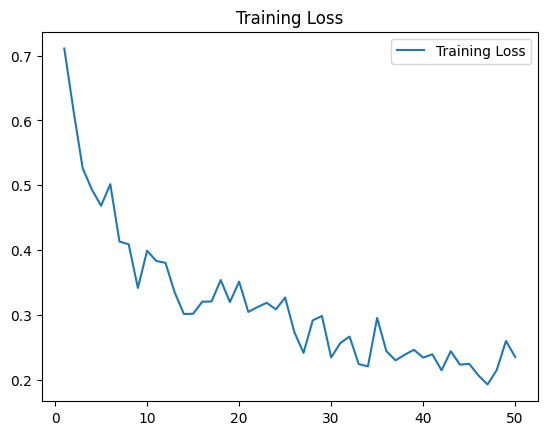

Found 180 images belonging to 2 classes.


c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - acc: 0.5402 - loss: 16.5968 

Test Accuracy:


c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
C:\Users\atg00\AppData\Local\Temp\ipykernel_17848\35461962.py:30: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  model2_test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


 0.5444444417953491
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step
Precisión:
0.4941860465116279


<Figure size 1000x1000 with 0 Axes>

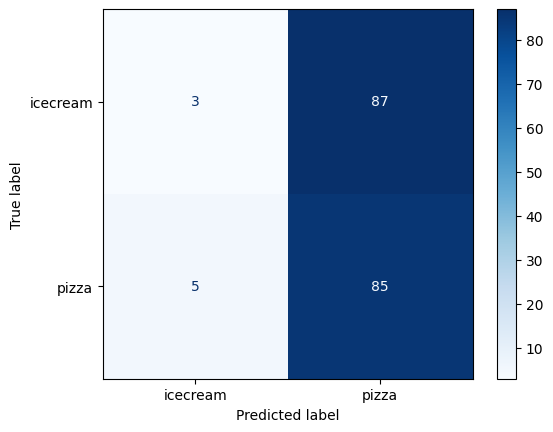

In [16]:
# Visualización de los resultados de entrenamiento
model2_acc = history.history['acc']
model2_loss = history.history['loss']
model2_epochs = range(1, len(model2_acc) + 1)

plt.plot(model2_epochs, model2_acc, '-', label='train accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.figure()

plt.plot(model2_epochs, model2_loss, '-', label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Generador de datos de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluación del modelo
model2_test_loss, model2_test_acc = model2.evaluate(test_generator, steps=25)
print('\nTest Accuracy:\n', model2_test_acc)

# Generar predicciones en el conjunto de prueba
model2_test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
model2_predictions = model2.predict(test_generator, steps=model2_test_steps_per_epoch)
model2_predicted_classes = np.where(model2_predictions > 0.5, 1, 0)

# Obtener etiquetas reales
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calcular matriz de confusión
model2_cm = confusion_matrix(true_classes, model2_predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=model2_cm, display_labels=class_labels)

# Calcular el valor de precisión
model2_precision = precision_score(true_classes, model2_predicted_classes)
print('Precisión:')
print(model2_precision)

# Mostrar matriz de confusión
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [17]:
# Guardar el modelo
model2.save("pizza_icecream.keras")